# Марковская цепь

# Оценка матрицы переходных вероятностей

In [2]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

### Практика - постройте матрицу вероятности для русской версии книги

In [68]:
with open('alice_ru.txt', 'r', encoding='utf-8') as f:
    text = f.read().lower()
text = re.sub('[^а-яё]','', text)

In [69]:
text[:10]

'мшайульттп'

In [70]:
RUSSIAN = 'абвгдежзийклмнопрстуфхцчшщъыьэюя' #исключил "ё" так как она в данной редакции не используется.
POS = {l: i for i, l in enumerate(RUSSIAN)}

In [71]:
POS

{'а': 0,
 'б': 1,
 'в': 2,
 'г': 3,
 'д': 4,
 'е': 5,
 'ж': 6,
 'з': 7,
 'и': 8,
 'й': 9,
 'к': 10,
 'л': 11,
 'м': 12,
 'н': 13,
 'о': 14,
 'п': 15,
 'р': 16,
 'с': 17,
 'т': 18,
 'у': 19,
 'ф': 20,
 'х': 21,
 'ц': 22,
 'ч': 23,
 'ш': 24,
 'щ': 25,
 'ъ': 26,
 'ы': 27,
 'ь': 28,
 'э': 29,
 'ю': 30,
 'я': 31}

In [72]:
probabilities = np.zeros((len(RUSSIAN), len(RUSSIAN)))

In [73]:
probabilities

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [74]:
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

In [75]:
probabilities

array([[  2.,  11.,  34., ...,   8.,  34.,   0.],
       [105., 270., 135., ...,  36., 259.,   0.],
       [  0.,  75.,   2., ...,   9.,   0.,  17.],
       ...,
       [  0.,  33.,   0., ...,   0.,   0.,   0.],
       [  0., 354.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [76]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [77]:
probabilities.sum(axis=1)[:, None]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [78]:
probabilities

array([[0.00458716, 0.02522936, 0.07798165, ..., 0.01834862, 0.07798165,
        0.        ],
       [0.01046025, 0.02689779, 0.01344889, ..., 0.00358637, 0.02580195,
        0.        ],
       [0.        , 0.04908377, 0.0013089 , ..., 0.00589005, 0.        ,
        0.01112565],
       ...,
       [0.        , 0.1314741 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.21008902, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [79]:
df = pd.DataFrame(probabilities, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))

In [80]:
df

,а,б,в,г,д,е,ж,з,и,й,...,ц,ч,ш,щ,ъ,ы,ь,э,ю,я
а,0.004587,0.025229,0.077982,0.002294,0.096330,0.006881,0.004587,0.009174,0.006881,0.048165,...,0.011468,0.052752,0.000000,0.000000,0.018349,0.011468,0.006881,0.018349,0.077982,0.000000
б,0.010460,0.026898,0.013449,0.000697,0.037956,0.024108,0.001395,0.016936,0.014644,0.017533,...,0.014644,0.054194,0.000000,0.000000,0.071329,0.010161,0.004881,0.003586,0.025802,0.000000
в,0.000000,0.049084,0.001309,0.000000,0.002618,0.164921,0.000000,0.000000,0.001963,0.077225,...,0.000654,0.003272,0.003272,0.246073,0.000000,0.000000,0.005236,0.005890,0.000000,0.011126
г,0.000000,0.313625,0.005141,0.000000,0.010283,0.133676,0.000000,0.007712,0.000000,0.043702,...,0.000000,0.043702,0.000000,0.048843,0.005141,0.005141,0.005141,0.000000,0.010283,0.000000
д,0.002200,0.183352,0.004767,0.009901,0.005134,0.183718,0.000000,0.001467,0.005501,0.076641,...,0.000000,0.034470,0.019435,0.022736,0.002567,0.000000,0.000733,0.000000,0.001100,0.000000
е,0.002760,0.004600,0.034437,0.008807,0.041930,0.029180,0.000131,0.043638,0.007229,0.010647,...,0.014984,0.053233,0.000000,0.000000,0.025499,0.025105,0.005126,0.007886,0.030231,0.000000
ж,0.000000,0.025000,0.000000,0.000000,0.000000,0.091667,0.000000,0.000000,0.000000,0.100000,...,0.000000,0.008333,0.000000,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
з,0.000000,0.059819,0.003386,0.000564,0.077314,0.031603,0.000000,0.001129,0.001129,0.047968,...,0.000000,0.006208,0.000000,0.000000,0.002822,0.000000,0.000000,0.000000,0.004515,0.000000
и,0.000000,0.123783,0.019471,0.002782,0.026426,0.026426,0.005563,0.012517,0.000000,0.058414,...,0.002782,0.097357,0.000000,0.000000,0.004172,0.002782,0.004172,0.001391,0.005563,0.000000
й,0.003454,0.006751,0.025436,0.015701,0.040823,0.025279,0.011462,0.016800,0.028262,0.022924,...,0.008479,0.057152,0.000000,0.000000,0.034856,0.013503,0.005024,0.001256,0.024808,0.000000


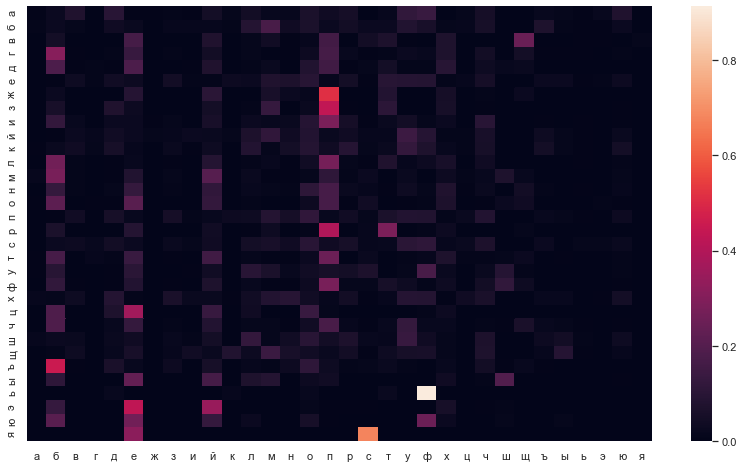

In [81]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

**Вопрос** - Такое чувство что я где то ошибся, столбец "а" пустой, а это одна из самых частых букв русского алфавита.  
**Подскажите где?**  
***Понял - это кодировка сбита в исходном файле***

# Задание 1

Скачайте текст "Война и мир". Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. 

In [132]:
toms =['war_and_peace/tom_1.txt', 'war_and_peace/tom_2.txt', 'war_and_peace/tom_3.txt', 'war_and_peace/tom_3.txt']

text = ''

for i in toms:
    with open('war_and_peace/tom_1.txt', 'r', encoding='utf-8') as f1:
            text1 = f1.read().lower()
            text1 = re.sub(r'[^a-яё ]+', '', text1)
            text1 = re.sub(r'[A-z]+', '', text1)   
            text = text + text1

text[-102:]

'желчный он не выздоровееткнязь андрей в числе других безнадежных раненых был сдан на попечение жителей'

In [140]:
text = re.sub(r'«', '', text)

In [142]:
text = re.sub(r'»', '', text)

После первого преобразования остались английские буквы, пришлось применить второе. Потом ещё пара скобок попалась. Причем из-за того что удалены служебные символы, кое где не хватает пробелов

In [143]:
RUSSIAN = ' абвгдеёжзийклмнопрстуфхцчшщъыьэюя' #исключил "" так как она в данной редакции не используется.
POS = {l: i for i, l in enumerate(RUSSIAN)}

probabilities = np.zeros((len(RUSSIAN), len(RUSSIAN)))

for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

In [144]:
POS

{' ': 0,
 'а': 1,
 'б': 2,
 'в': 3,
 'г': 4,
 'д': 5,
 'е': 6,
 'ё': 7,
 'ж': 8,
 'з': 9,
 'и': 10,
 'й': 11,
 'к': 12,
 'л': 13,
 'м': 14,
 'н': 15,
 'о': 16,
 'п': 17,
 'р': 18,
 'с': 19,
 'т': 20,
 'у': 21,
 'ф': 22,
 'х': 23,
 'ц': 24,
 'ч': 25,
 'ш': 26,
 'щ': 27,
 'ъ': 28,
 'ы': 29,
 'ь': 30,
 'э': 31,
 'ю': 32,
 'я': 33}

In [145]:
probabilities.sum(axis=1)[:, None]

array([[442516.],
       [180728.],
       [ 37208.],
       [ 99188.],
       [ 44672.],
       [ 65520.],
       [169900.],
       [  1724.],
       [ 21824.],
       [ 38368.],
       [143164.],
       [ 24819.],
       [ 77260.],
       [109052.],
       [ 63696.],
       [140392.],
       [244948.],
       [ 55356.],
       [ 98196.],
       [112424.],
       [122396.],
       [ 61772.],
       [  4824.],
       [ 18380.],
       [  8716.],
       [ 29372.],
       [ 20348.],
       [  6044.],
       [  1132.],
       [ 40892.],
       [ 41980.],
       [  6512.],
       [ 13976.],
       [ 49888.]])

In [146]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])


In [147]:
df = pd.DataFrame(probabilities, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))
df.iloc[:5,:5]

,,а,б,в,г
,0.077828,0.016695,0.041960,0.085430,0.029188
а,0.230291,0.000243,0.009606,0.048891,0.013678
б,0.016556,0.078693,0.001720,0.002580,0.001290
в,0.156067,0.149333,0.000403,0.000807,0.000726
г,0.047905,0.059097,0.000000,0.004388,0.000000


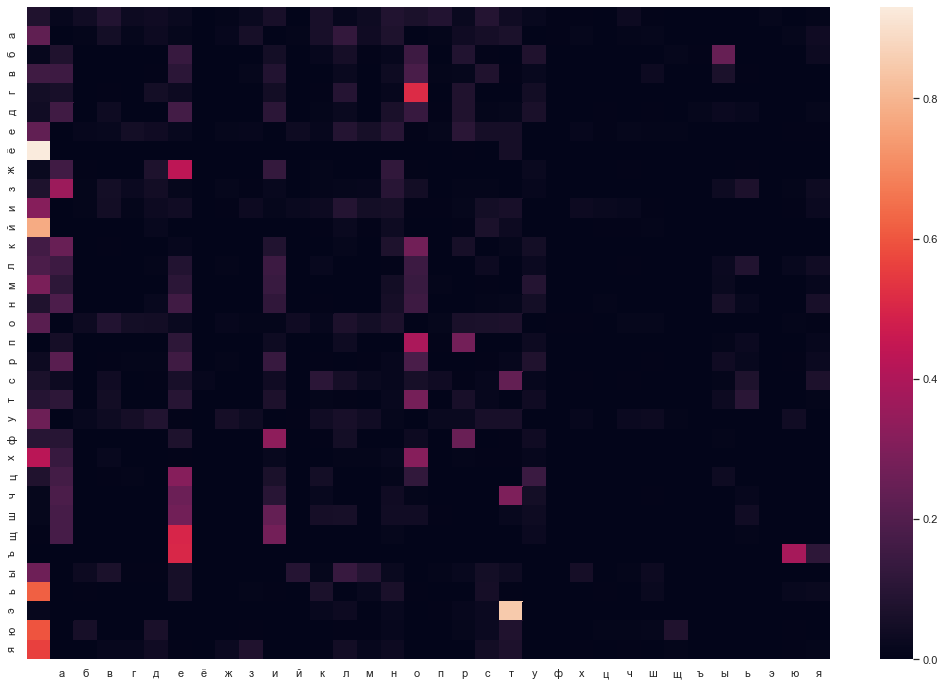

In [148]:
plt.figure(figsize=(18,12))
sns.heatmap(df)
plt.show()

Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р.

In [155]:
start = POS['п']
end = POS['р']
prior = 1. / len(RUSSIAN)
for i in RUSSIAN:
    if i != ' ':
        for j in RUSSIAN:
            if j != ' ':
                proba = prior * probabilities[start, POS[i]] * probabilities[POS[i], POS[j]] * probabilities[POS[j], end]
                if proba > 0.00001:
                    print(''.join(['п', i, j, 'р']), proba)

пегр 1.289123450649265e-05
пепр 1.3070781235722301e-05
петр 1.0410183492039133e-05
побр 3.044931249563154e-05
повр 1.184036438186589e-05
погр 4.351228552163012e-05
подр 4.281177192917951e-05
поер 2.5982397849612053e-05
покр 1.1625508841332308e-05
попр 3.683359162997977e-05
потр 4.7558245267724026e-05
пофр 1.4304379775441625e-05
прар 6.684419790935848e-05
прер 0.0001274229739682576
прир 1.3097851201096599e-05
прор 9.284334741372856e-05
прур 1.5373283774638692e-05


Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы “Б” и имеющее длину 8-мь символов.

In [191]:
s = []
start = 'б'
s.append(start)
length = 8
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(RUSSIAN), p=probabilities[index])
    
    while next_char == ' ':
        next_char = np.random.choice(list(RUSSIAN), p=probabilities[index])
       
    s.append(next_char)

print (''.join(s).title())

Бритьцели


## Эксперименты:
 * поварьировать число компонент HMM,
 * Для обучения HMM необходимо задать какое-то начальное приближение ее параметров. В этот процесс можно вмешаться с помощью явного задания априорного распределения с помощью спецификации model.transmat_. Другие параметры модели доступны по `model.<TAB>`
 * HMM обучается на основе градиентного спуска в пространстве параметров (оптимизируется правдоподобие выборки). Различные инициализации приводят (в общем случае) к различным результатам оптимизации. Попробуйте обучить набор моделей HMM для понимания, насколько устойчиво обучение. Посмотрите на model.score(X) для оценки логарифма правдоподобия обучающей выборки.
 * Число итераций, заданное для обучения, влияет на качество модели. Модель будет продолжать оптимизацию, пока не прошло n_iter шагов градиентного спуска или пока изменение score выше, чем заданный порог tol. Заметьте, что в зависимости от используемых данных модель может и не окончить оптимизацию за n_iter шагов.

In [40]:
from hmmlearn.hmm import GaussianHMM

In [41]:
series = pd.read_csv("D:/Учеба/Lern DS of Netology/Курс ML 3 Временные ряды/01_Знакомство с временными рядами/Series/daily-total-female-births-in-cal.csv")["Count"]

In [42]:
values = series.values.reshape(-1,1)

In [46]:
for n in range(1, 21):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -1245.3909354932182
2 -1231.4128457923264
3 -1228.616501967875
4 -1222.480614437126
5 -1214.072485075459
6 -1210.5117447199784
7 -1200.84195067312
8 -1191.1987130585867
9 -1184.0493740999582
10 -1159.6520316015294
11 -1157.4868966517943
12 -1153.208628685992
13 -1146.8152573197403
14 -1116.5787469491097
15 -1122.4636405952517
16 -1095.4594651562606
17 -1106.078064889361


Fitting a model with 398 free scalar parameters with only 365 data points will result in a degenerate solution.


18 -1086.3755872138036


Fitting a model with 439 free scalar parameters with only 365 data points will result in a degenerate solution.


19 -1067.5205146290293
20 -1060.6067904307397


Fitting a model with 439 free scalar parameters with only 365 data points will result in a degenerate solution.


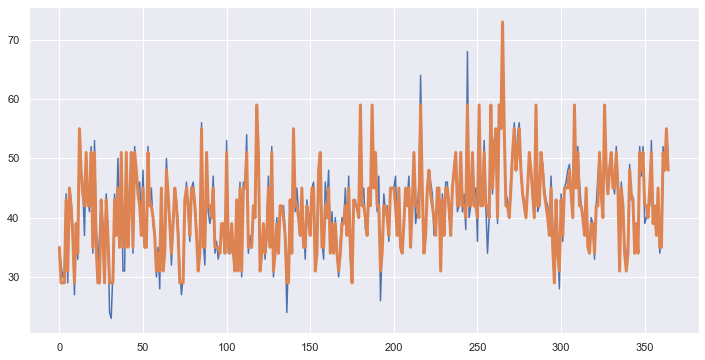

In [47]:
model = GaussianHMM(n_components=20,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

In [82]:
startprob = np.array([0.6, 0.3, 0.1, 0.0])
# The transition matrix, note that there are no transitions possible
# between component 1 and 3
transmat = np.array([[0.7, 0.2, 0.0, 0.1],
                     [0.3, 0.5, 0.2, 0.0],
                     [0.0, 0.3, 0.5, 0.2],
                     [0.2, 0.0, 0.2, 0.6]])
# The means of each component
means = np.array([[0.0,  0.0],
                  [0.0, 11.0],
                  [9.0, 10.0],
                  [11.0, -1.0]])
# The covariance of each component
covars = .5 * np.tile(np.identity(2), (4, 1, 1))

# Build an HMM instance and set parameters
model = hmm.GaussianHMM(n_components=4, covariance_type="full")

# Instead of fitting it from the data, we directly set the estimated
# parameters, the means and covariance of the components
model.startprob_ = startprob
model.transmat_ = transmat
model.means_ = means
model.covars_ = covars

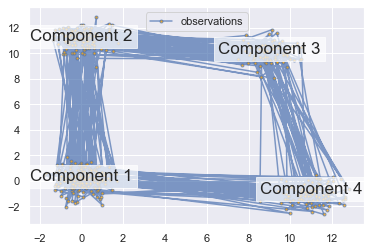

In [83]:
# Generate samples
X, Z = model.sample(500)

# Plot the sampled data
plt.plot(X[:, 0], X[:, 1], ".-", label="observations", ms=6,
         mfc="orange", alpha=0.7)

# Indicate the component numbers
for i, m in enumerate(means):
    plt.text(m[0], m[1], 'Component %i' % (i + 1),
             size=17, horizontalalignment='center',
             bbox=dict(alpha=.7, facecolor='w'))
plt.legend(loc='best')
plt.show()

## Практика. Спрогнозируйте ряд на 10 измерений вперед (через среднее каждой компоненты)

In [193]:
# Построим предсказания на 10 шагов
n = 10

model = GaussianHMM(n_components=20,
                    covariance_type="diag",
                    n_iter=1000)             

model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
prognoz = means
last_label = labels[-1]

for i in range(n):
    last_label = np.random.choice(list(range(model.n_components)), p=model.transmat_[last_label])
    prognoz = np.concatenate((prognoz, model.means_[last_label].reshape(-1,1)))

Fitting a model with 439 free scalar parameters with only 365 data points will result in a degenerate solution.


# Задание 2

- [Выберите ряд](https://datamarket.com/data/list/?q=cat:fpg%20provider:tsdl) и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.

In [194]:
series = pd.read_csv("D:/Учеба/Lern DS of Netology/Курс ML 3 Временные ряды/01_Знакомство с временными рядами/Series/daily-total-female-births-in-cal.csv")["Count"]

In [195]:
values = series.values.reshape(-1,1)

In [196]:
n_comp    = [2,4,8,10,12,14,16,18]
cov_type  = ['spherical', 'tied', 'diag', 'full']
df_2      = pd.DataFrame(np.zeros([8,4]), index = n_comp, columns= cov_type)

for row in range(8):
    for col in range(4):
        model = GaussianHMM(n_components = n_comp[row], 
                            covariance_type=cov_type[col],  
                            n_iter=1000)             
        model.fit(values)
        df_2.iloc[row,col] = model.score(values) 

(4.5, -0.5)

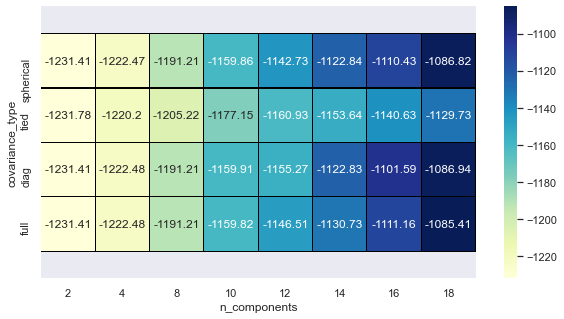

In [197]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.heatmap(df_2.round(2).T,  
                annot = True, 
                fmt='.6g', 
                cmap= 'YlGnBu', 
                linewidths=0.1, 
                linecolor='black', 
                square=True)

plt.xlabel('n_components')
plt.ylabel('covariance_type')
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

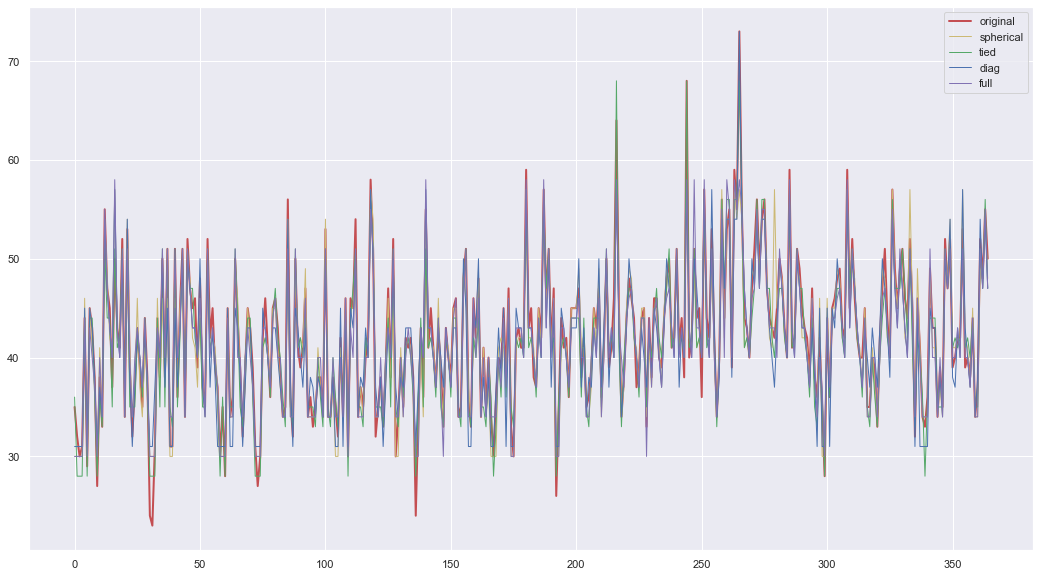

In [198]:
n_comp    = 12
colours   = ['y', 'g', 'b', 'm']

plt.figure(figsize=(18, 10))
plt.plot(values, linewidth = 2, c='r', label='original')

for col in range(4):
    model = GaussianHMM(n_components = n_comp, 
                        covariance_type=cov_type[col],  
                        n_iter=1000)             
    model.fit(values)
    labels = model.predict(values)
    means = np.zeros_like(values)
    for i in range(model.n_components):
        means[labels == i] = model.means_[i]
    plt.plot(means, linewidth = 1, c= colours[col], label=cov_type[col])
    
plt.legend(loc="best")

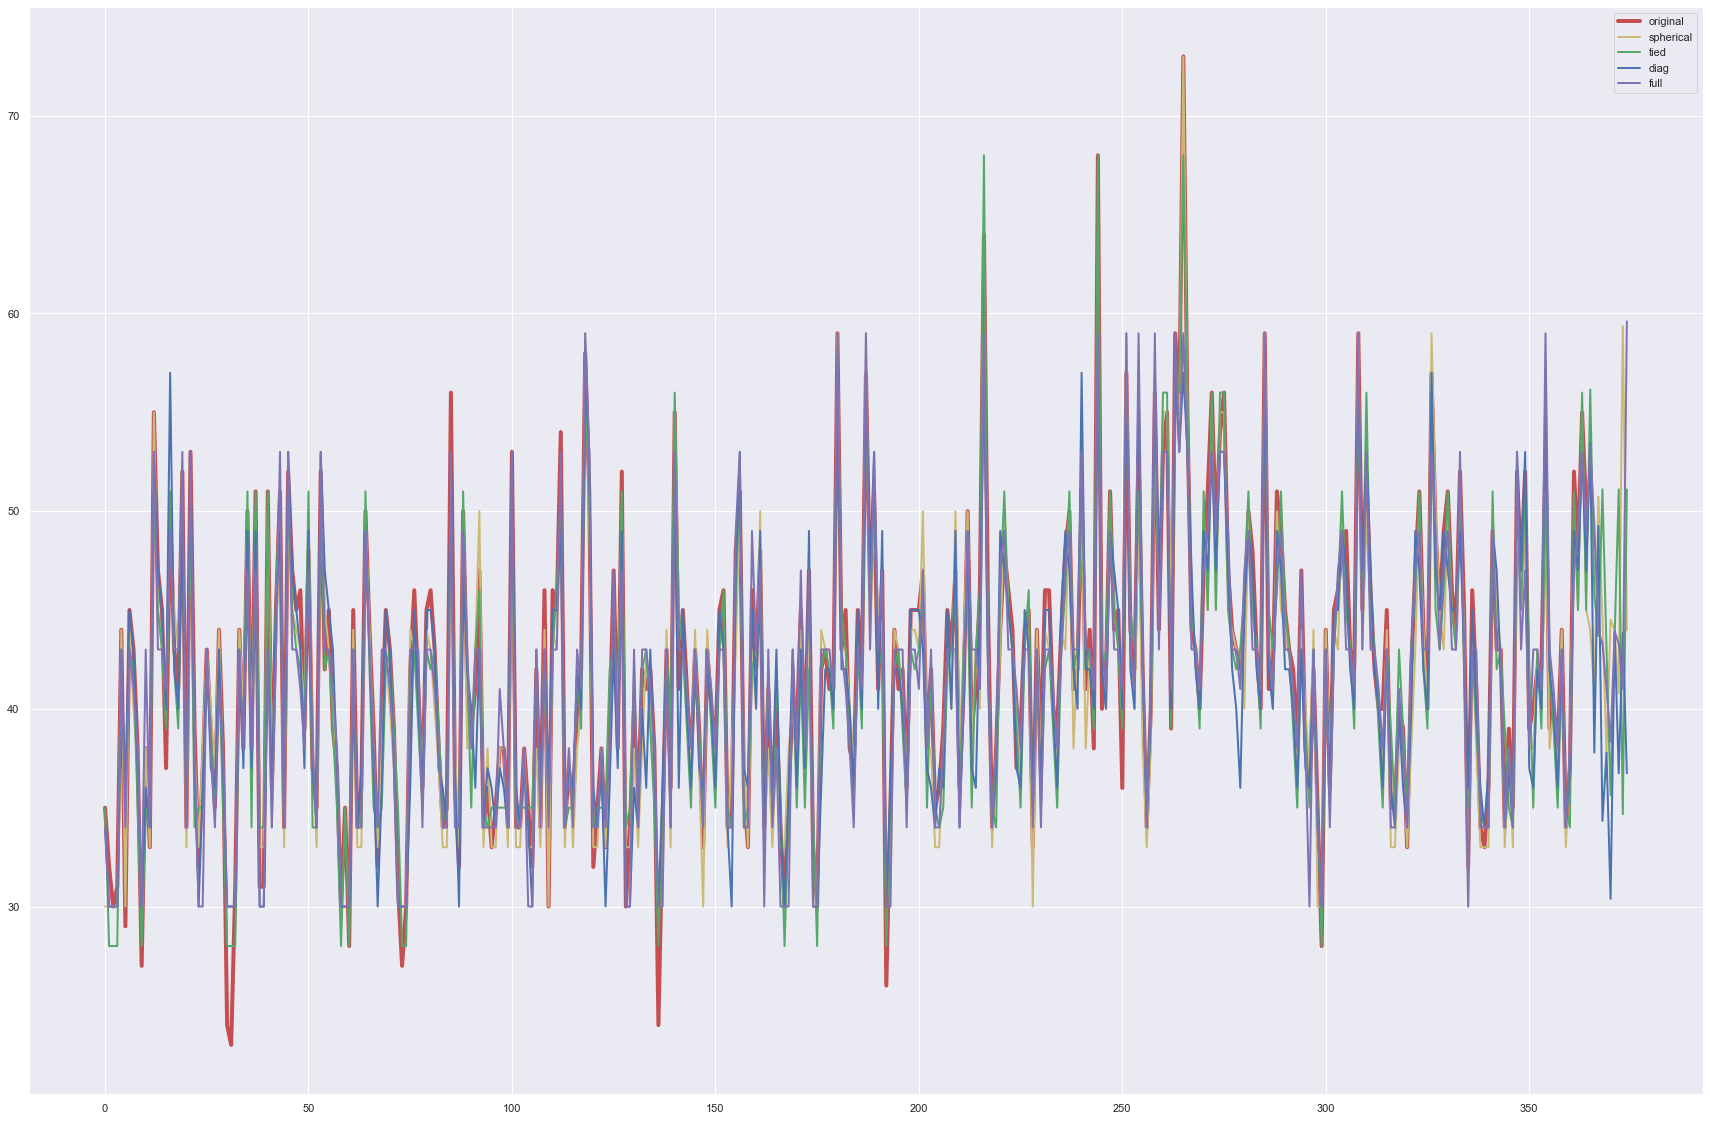

In [199]:
n = 10
plt.figure(figsize=(30, 20))
plt.plot(values, linewidth=4, c='r', label='original')


for col in range(4):
    model = GaussianHMM(n_components = n_comp, 
                        covariance_type=cov_type[col],  
                        n_iter=1000)             
    model.fit(values)
    labels = model.predict(values)
    means = np.zeros_like(values)
    for i in range(model.n_components):
        means[labels == i] = model.means_[i]
    
    prognos = means
    last_label = labels[-1]
    for i in range(n):
        last_label = np.random.choice(list(range(model.n_components)), p=model.transmat_[last_label])
        prognos = np.concatenate((prognos, model.means_[last_label].reshape(-1,1)))
    plt.plot(prognos, linewidth=2, c=colours[col], label=cov_type[col])
    
plt.legend(loc="best")